In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("netflix_titles.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8806 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


average release year is 2014

In [5]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Relation between type and its count

<AxesSubplot:xlabel='type', ylabel='Count'>

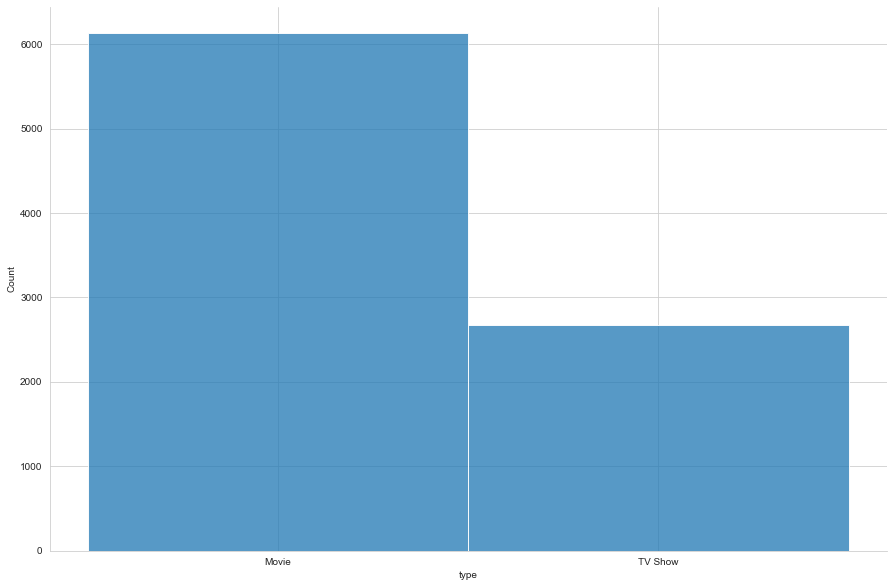

In [7]:
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)

sns.histplot(
    data,
    x="type",
    multiple="stack",
    palette="tab10",
    edgecolor="1",
    linewidth=.9,
)

Netflix produce more movies than tv shows

split where the product listed in to one key

In [8]:
data['listed']=data['listed_in'].apply(lambda type: str(type).split(" ")[0] if(str(type).__contains__(" "))else type )
data['listed']=data['listed'].apply(lambda type: str(type).split(",")[0] if(str(type).__contains__(","))else str(type).split("'")[0] if(str(type).__contains__("'")) else type)

Relation between type of products and its count

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

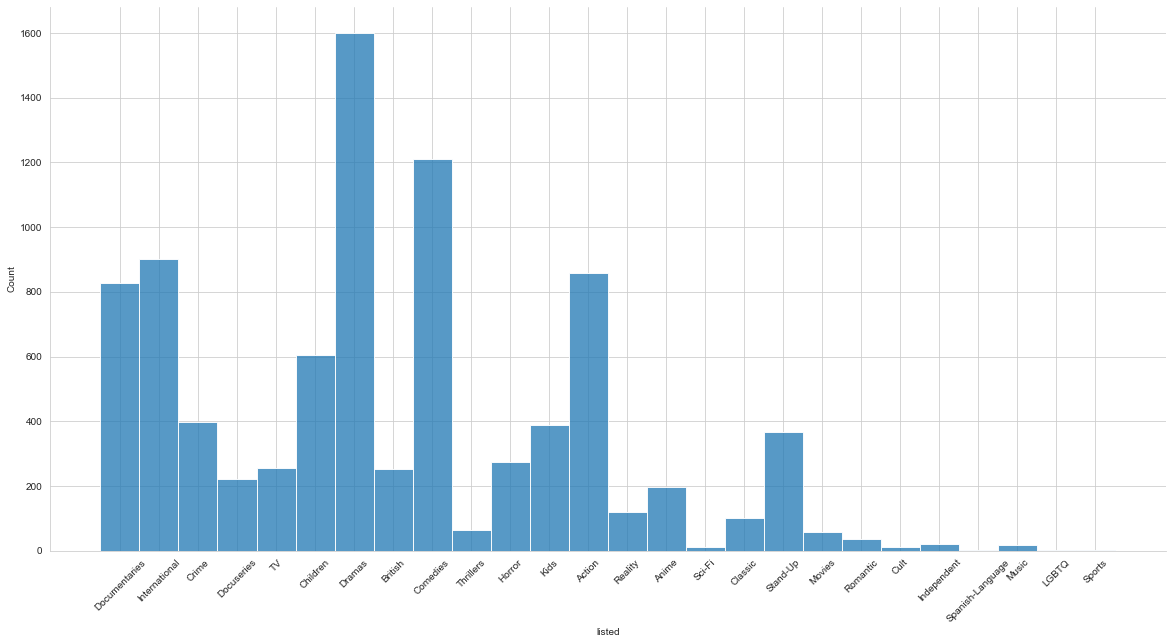

In [9]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    data,
    x="listed",
    multiple="stack",
    palette="tab10",
    edgecolor="1",
    linewidth=.9,
)
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)

the most produced types are Dramas and Comedies product

Relation between type of product and release year

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

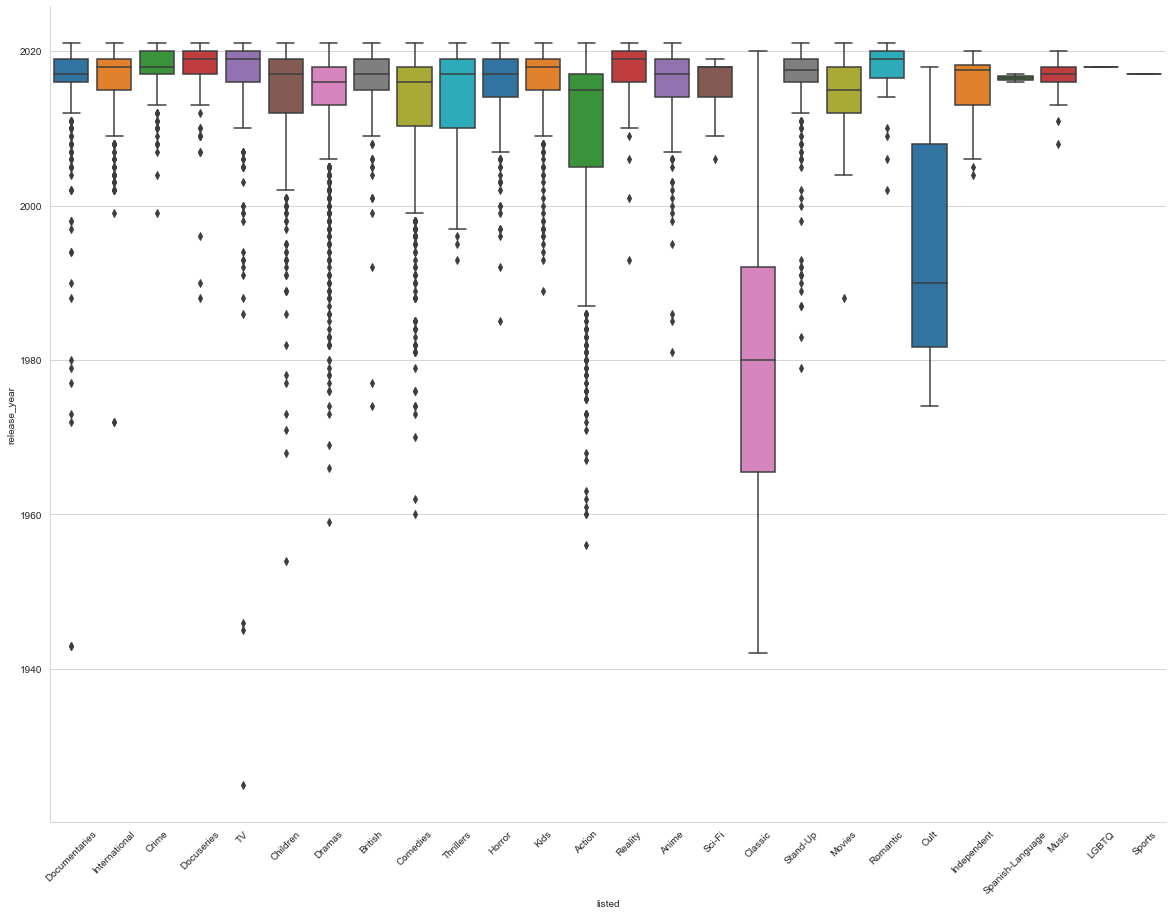

In [10]:
f, ax = plt.subplots(figsize=(20, 15))
sns.despine(f)
sns.boxplot(x="listed", y="release_year",
             palette="tab10",
            data=data)
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)



As we see in this graph netflix gradually reduce the number of classic and cult type

some rows contain duration in the rating column
the next function fix this

In [42]:
data['rating']=data['rating'].apply(lambda type: None if(str(type).__contains__("min")) else type)

Relation between type of program and its count hued by the age rating

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

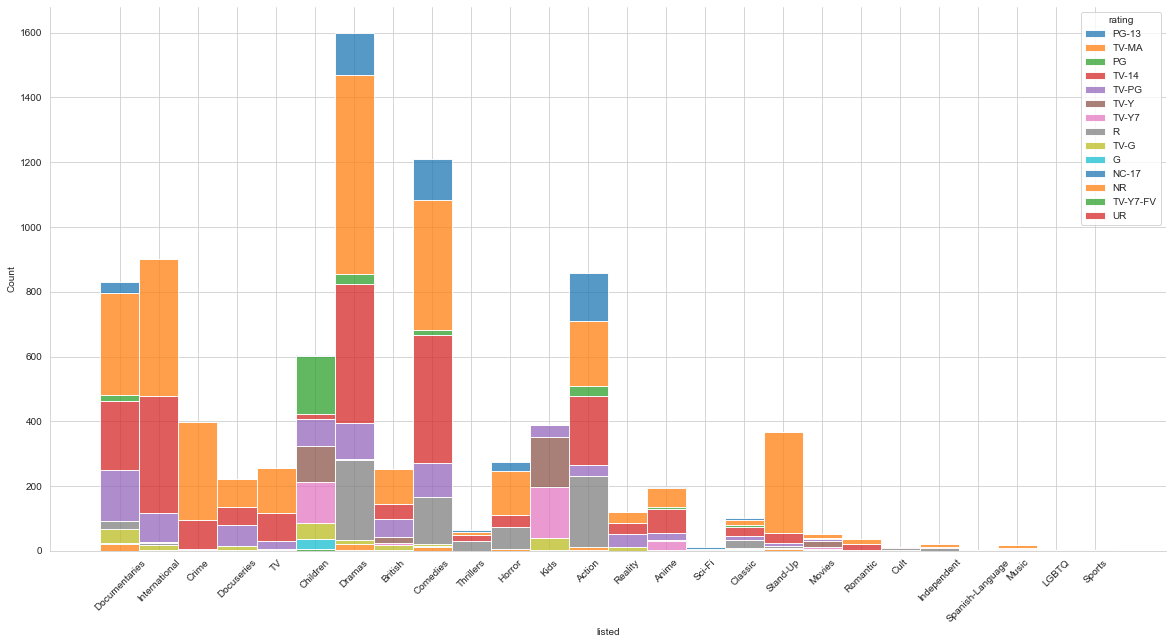

In [43]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    data,
    x="listed",hue="rating",
    multiple="stack",
    palette="tab10",
    edgecolor="1",
    linewidth=.9,
)
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)

as we see in the previous chart the most produced type was drama and comedies  so, as we se here netflix offers this types for all ratings so the majority of audience can see these types

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

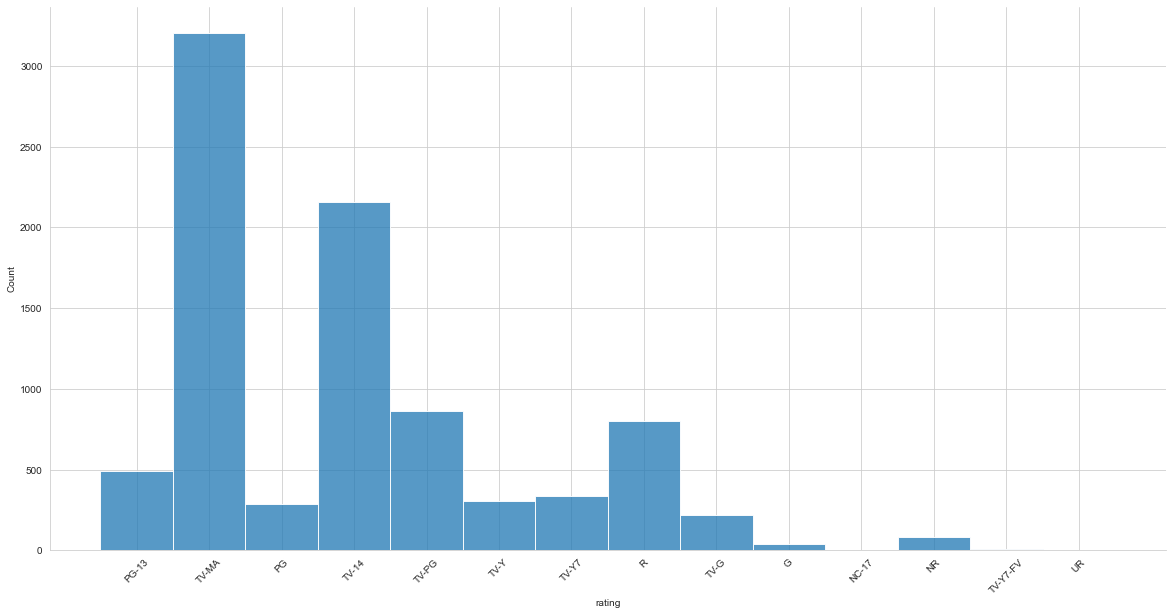

In [23]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)

sns.histplot(
    data,
    x="rating",
    multiple="stack",
    palette="tab10",
    edgecolor="1",
    linewidth=.9,
)
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)

This rating responsible for age restriction
the majority of netflix product focused on mature, adult audiences
TV-MA - these programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.

filter country column to have on key

In [35]:
data['country_filtered']=data['country'].apply(lambda type: str(type).split(",")[0] if(str(type).__contains__(","))else type)

relation between country and its count

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

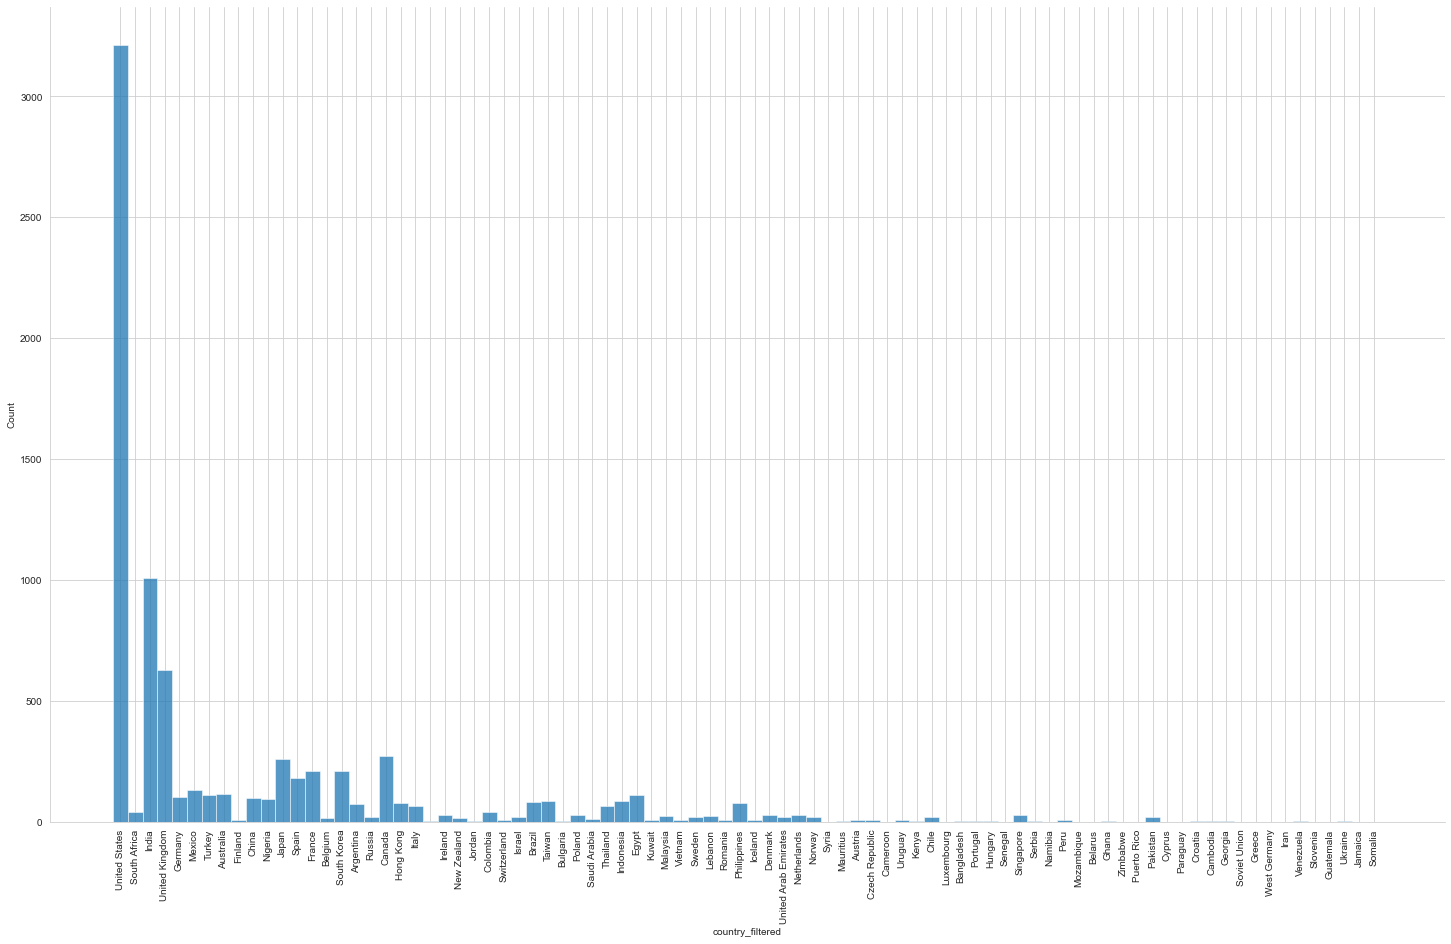

In [41]:
f, ax = plt.subplots(figsize=(25, 15))
sns.despine(f)

sns.histplot(
    data,
    x="country_filtered",
    multiple="stack",
    palette="tab10",
    edgecolor="1",
    linewidth=.5,
)
locs, labels = plt.xticks()
plt.setp(labels,rotation=90)

most product cast in the USA followed by india then UK